In [1]:
import re
import json
import os
import pandas as pd
import pickle


# Extract

In [2]:
def read_img_json(filename):
    with open(filename, 'r') as f:
    # Load the data from the file using the custom decoder
        data = json.load(f, cls=UnquotedPropertyDecoder)
    return data

In [3]:
def read_img_json(filename):
    with open(filename, 'r') as f:
    # Load the data from the file using the custom decoder
        data = json.load(f, cls=UnquotedPropertyDecoder)
    return data

class UnquotedPropertyDecoder(json.JSONDecoder):
    def decode(self, s, *args, **kwargs):
        # Replace unquoted property names with quoted property names
        s = re.sub(r'([{,]\s*)(\w+)(\s*:)', r'\1"\2"\3', s)
        return super(UnquotedPropertyDecoder, self).decode(s, *args, **kwargs)


In [4]:
confidence = 0.5

In [5]:
filenames = { folder:
    [
        file
        for file in os.listdir(f'data/{folder}') 
        if '.json' in file 
    ] 
    for folder in os.listdir('data')
}


In [6]:
extract = {}

In [7]:
all_labels = []
for folder, files in filenames.items():
    extract[folder] = {}
    for file in files:
        data = read_img_json(os.path.join('data', folder, file))    
        #print(data)
        labels = [
            x.get('Name') 
            for x in data['Labels']
            if x.get('Confidence') > confidence
        ]
        extract[folder][file] = labels
        all_labels.extend(labels)
label_counts = pd.Series(all_labels).value_counts()
label_counts.index = [i.lower() for i in label_counts.index.values]


In [8]:
label_counts = pd.Series(all_labels).value_counts()
label_counts.index = [i.lower() for i in label_counts.index.values]


In [9]:
all_labels = sorted(list(set(all_labels)))

In [11]:
all_labels

['Abies',
 'Accessories',
 'Accessory',
 'Adventure',
 'Aircraft',
 'Alcohol',
 'Alloy Wheel',
 'Aluminium',
 'Amusement Park',
 'Animal',
 'Ankle',
 'Apparel',
 'Appliance',
 'Architecture',
 'Arm',
 'Armchair',
 'Art',
 'Asphalt',
 'Athlete',
 'Audience',
 'Automobile',
 'Azure Sky',
 'Baby',
 'Back',
 'Backpack',
 'Backyard',
 'Bag',
 'Bakery',
 'Ball',
 'Balloon',
 'Banister',
 'Bar Counter',
 'Barefoot',
 'Bazaar',
 'Beach',
 'Beanie',
 'Bear',
 'Beard',
 'Bed',
 'Beer',
 'Beer Glass',
 'Bench',
 'Beverage',
 'Bicycle',
 'Bike',
 'Bikini',
 'Bird',
 'Birthday Cake',
 'Birthday Party',
 'Biscuit',
 'Blade',
 'Blizzard',
 'Blonde',
 'Blossom',
 'Blouse',
 'Boat',
 'Bomb',
 'Boot',
 'Bottle',
 'Bowl',
 'Boy',
 'Bread',
 'Buffet',
 'Building',
 'Bun',
 'Burger',
 'Cable Car',
 'Cafeteria',
 'Cake',
 'Camera',
 'Can',
 'Candle',
 'Canine',
 'Cap',
 'Car',
 'Carnival',
 'Cell Phone',
 'Chair',
 'Child',
 'Chocolate',
 'City',
 'Clothing',
 'Cloud',
 'Coast',
 'Coat',
 'Coffee Table',
 '

In [12]:
data = []
for label, images in extract.items():
    for image, labels in images.items():
        row = [label]
        for i in all_labels:
            row.append(1 if i in labels else 0)
        data.append(row)

In [13]:
data = pd.DataFrame(data)
data.columns = ['label']+[i.lower() for i in all_labels]


# Explore

In [14]:
data.label.value_counts()

summer-with-grandkids    118
skiing-holiday            68
garden-birthday-party     67
day-at-beach              60
Name: label, dtype: int64

In [15]:
data.describe(include='all')

,label,abies,accessories,accessory,adventure,aircraft,alcohol,alloy wheel,aluminium,amusement park,...,wheel,wildlife,winter,woman,wood,woodland,working out,yard,yoga,zoo
count,313,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000,...,313.000000,313.000000,313.000000,313.00000,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000
unique,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,summer-with-grandkids,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,118,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,0.025559,0.115016,0.115016,0.044728,0.006390,0.076677,0.003195,0.003195,0.003195,...,0.003195,0.003195,0.035144,0.13099,0.019169,0.009585,0.019169,0.019169,0.003195,0.003195
std,NaN,0.158069,0.319552,0.319552,0.207038,0.079808,0.266505,0.056523,0.056523,0.056523,...,0.056523,0.056523,0.184438,0.33793,0.137339,0.097587,0.137339,0.137339,0.056523,0.056523
min,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


### identify correlated variables and remove

In [16]:
import seaborn as sns

<AxesSubplot: >

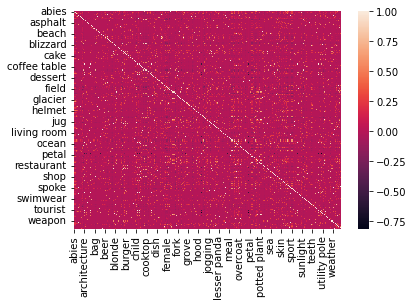

In [17]:
sns.heatmap(data.corr())

In [18]:
correlation_limit = 0.6

In [19]:
corrs = data.corr()

# here we should maybe look at max individual correlations with dummy variables of target 

In [20]:
corrs = data.corr()
keep_vars = []
for i in corrs:
    highs = corrs[i][corrs[i]>correlation_limit]
    ranked = pd.merge(highs, pd.DataFrame(label_counts), left_index=True, right_index=True)
    keep_vars.append(ranked.sort_values(0, ascending=False).iloc[0].name)
    
model_data = data[['label']+sorted(list(set(keep_vars)))]

    

In [21]:
len(set(keep_vars))

164

In [22]:
model_data = data[['label']+sorted(list(set(keep_vars)))]

# mapper = {label:n for n, label in enumerate(model_data.label.unique())}
# model_data.label = model_data.label.replace(mapper).astype(str)

# Model

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X = model_data.drop(columns=['label'])

In [25]:
y = model_data.label

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)



In [27]:
y_train.value_counts()

summer-with-grandkids    109
skiing-holiday            60
garden-birthday-party     58
day-at-beach              54
Name: label, dtype: int64

In [28]:
from sklearn.utils import resample


In [29]:
train = X_train.assign(label=y_train)

In [30]:
balanced_X = pd.DataFrame()
balanced_y = pd.Series()

for i in train.label.unique():
    subset = train[train.label==i]
    X_oversampled, y_oversampled = resample(subset.drop(columns=['label']),
                                        subset.label,
                                        replace=True,
                                        n_samples=y_train.value_counts().max(),
                                        random_state=1)
    balanced_X = pd.concat([balanced_X, X_oversampled])
    balanced_y = pd.concat([balanced_y, y_oversampled])

/var/folders/q3/0brx56793x93gv9xy8dl5h7c0000gq/T/ipykernel_31943/2381193370.py:2: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  balanced_y = pd.Series()


In [31]:
balanced_y.value_counts()

garden-birthday-party    109
summer-with-grandkids    109
day-at-beach             109
skiing-holiday           109
dtype: int64

In [32]:
from sklearn.linear_model import ElasticNet

from sklearn.multiclass import OneVsRestClassifier

from sklearn.linear_model import LogisticRegression


from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV


clf = OneVsRestClassifier(LogisticRegression(penalty='l1', random_state=42, solver ='liblinear'))


In [33]:
param_grid = {'estimator__C': [1,0.1, 0.01, 0.001]}

# Perform a grid search with 5-fold cross-validation
grid_search = GridSearchCV(clf, param_grid, cv=5)
grid_search.fit(balanced_X, balanced_y)

# Print the best hyperparameters and the corresponding mean score
print("Best hyperparameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

Best hyperparameters: {'estimator__C': 1}
Best score: 0.974712643678161


In [34]:
grid_search.cv_results_

{'mean_fit_time': array([0.01193399, 0.00798769, 0.00664706, 0.00680857]),
 'std_fit_time': array([3.77241052e-03, 2.44940039e-04, 8.45696477e-05, 2.41777289e-04]),
 'mean_score_time': array([0.00479584, 0.0036603 , 0.00367098, 0.00384059]),
 'std_score_time': array([0.001118  , 0.00010341, 0.00043321, 0.00064553]),
 'param_estimator__C': masked_array(data=[1, 0.1, 0.01, 0.001],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'estimator__C': 1},
  {'estimator__C': 0.1},
  {'estimator__C': 0.01},
  {'estimator__C': 0.001}],
 'split0_test_score': array([1.        , 0.85227273, 0.25      , 0.25      ]),
 'split1_test_score': array([1.        , 0.87356322, 0.25287356, 0.25287356]),
 'split2_test_score': array([0.94252874, 0.8045977 , 0.25287356, 0.25287356]),
 'split3_test_score': array([0.98850575, 0.85057471, 0.24137931, 0.24137931]),
 'split4_test_score': array([0.94252874, 0.86206897, 0.25287356, 0.25287356]),
 'mean_tes

In [35]:
from sklearn.metrics import fbeta_score

In [36]:
scores = cross_val_score(clf, balanced_X, balanced_y, cv=5)
# Print the accuracy scores for each fold
print("Accuracy scores:", scores)

# Print the mean accuracy and standard deviation
print("Mean accuracy:", scores.mean())
print("Standard deviation:", scores.std())

Accuracy scores: [1.         1.         0.94252874 0.98850575 0.94252874]
Mean accuracy: 0.974712643678161
Standard deviation: 0.02661111931675916


In [37]:
from sklearn.metrics import confusion_matrix

In [38]:



clf.fit(balanced_X, balanced_y)


clf.fit(balanced_X, balanced_y)


clf.score(X_test, y_test)


0.96875

In [39]:
# open a file in binary mode
with open('log_reg.pickle', 'wb') as file:
    # dump the object to the file
    pickle.dump(clf, file)

In [40]:



labels = sorted(train.label.unique())
labels

['day-at-beach',
 'garden-birthday-party',
 'skiing-holiday',
 'summer-with-grandkids']

In [41]:
confusion_matrix(y_test, y_pred, labels = labels)

NameError: name 'y_pred' is not defined

In [ ]:
y_pred

In [43]:
import numpy as np

In [44]:
features = clf.feature_names_in_[((np.abs(clf.estimators_[0].coef_) > 0) |\
(np.abs(clf.estimators_[1].coef_) > 0) |\
(np.abs(clf.estimators_[2].coef_) > 0) |\
(np.abs(clf.estimators_[3].coef_) > 0))[0]]

In [45]:
features

array(['accessories', 'animal', 'apparel', 'art', 'ball', 'beer glass',
       'beverage', 'cake', 'cap', 'child', 'coat', 'couch', 'crowd',
       'dating', 'denim', 'exercise', 'face', 'family', 'female',
       'finger', 'food', 'footwear', 'furniture', 'hat', 'heel', 'helmet',
       'human', 'indoors', 'kite', 'leisure activities', 'nature',
       'party hat', 'people', 'plant', 'shorts', 'skin', 'sleeve', 'snow',
       'sport', 'swimwear', 'tourist', 'transportation', 'vacation',
       'water', 'woman'], dtype=object)

In [50]:
# open a file in binary mode
with open('features.pickle', 'wb') as file:
    # dump the object to the file
    pickle.dump(features.tolist(), file)

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier


param_grid = {
	'n_estimators': [25, 50, 100, 150],
	'max_features': ['sqrt', 'log2', None],
	'max_depth': [3, 6, 9],
	'max_leaf_nodes': [3, 6, 9],
}


grid_search = GridSearchCV(RandomForestClassifier(),
                           param_grid=param_grid, verbose = 1)
grid_search.fit(balanced_X, balanced_y)
print(grid_search.best_estimator_)

In [154]:
selected = grid_search.best_estimator_.get_params()

In [155]:
rf = RandomForestClassifier(**selected)

In [156]:
scores = cross_val_score(rf, balanced_X, balanced_y, cv=5)
# Print the accuracy scores for each fold
print("Accuracy scores:", scores)

# Print the mean accuracy and standard deviation
print("Mean accuracy:", scores.mean())
print("Standard deviation:", scores.std())

Accuracy scores: [0.94318182 0.96551724 0.90804598 0.95402299 0.91954023]
Mean accuracy: 0.9380616509926855
Standard deviation: 0.02134841247081346


In [157]:


rf.fit(balanced_X, balanced_y)


rf.score(X_test, y_test)

0.9375

# Follow ups



Latitudes and longitudes - map to countries - Andorra / france for skiing for example
time stamps - time of year could be indicative - summer vs skiing.  Could also combine with country since different countries have different seasons.



more data would mean RF maybe improve performance, currently overfitting
Better idea of scoring - currently very small test data sets 



# ensure covered:

project
- how you build machine learning pipelines
- approach new datasets
- evaluate strengths and weaknesses of machine learning models.

in person:
- productionised
- suitable for running in an offline-mobile environment
- iterated for improved results in the future.